# Model Testing with real data

In [3]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import load_model
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import scipy
from PIL import Image
from scipy import ndimage

In [4]:
# Load trained model
from keras.models import model_from_json 

json_file = open("model.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)
 
# model weight load 
loaded_model.load_weights("model_weight.h5")
print("Loaded model from disk")

Loaded model from disk


Your algorithm predicts: y = [5]


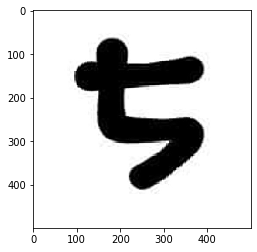

In [5]:
# Fit algorithm.
image = np.array(Image.open('real_data/5/17.jpg'))
img1 = Image.fromarray(image).convert('L') # gray
img2 = img1.resize((28,28))
img3 = ((np.array(img2) / 255) - 1) * -1


plt.imshow(image)
print("Your algorithm predicts: y = " + str(loaded_model.predict_classes(img3.reshape((1, 28, 28, 1)))))

In [6]:
# Make real dataset
x_real = []
y_real = np.zeros((1,50))
pred_real = []
for i in range(0,10):
    for j in range(1,51):
        image = np.array(Image.open('real_data/{0}/{1}.jpg'.format(i,j)))
        img1 = Image.fromarray(image).convert('L') # gray
        img2 = img1.resize((28,28))
        img3 = ((np.array(img2) / 255) - 1) * -1
        x_real.append(img3)

for i in range(1,10):
    y_real = np.append(y_real, np.full((1, 50),i), axis = 1)
    
for i in range(500):
    pred = loaded_model.predict_classes(x_real[i].reshape((1, 28, 28, 1)))
    pred_real.append(pred)

In [7]:
np.shape(y_real)

(1, 500)

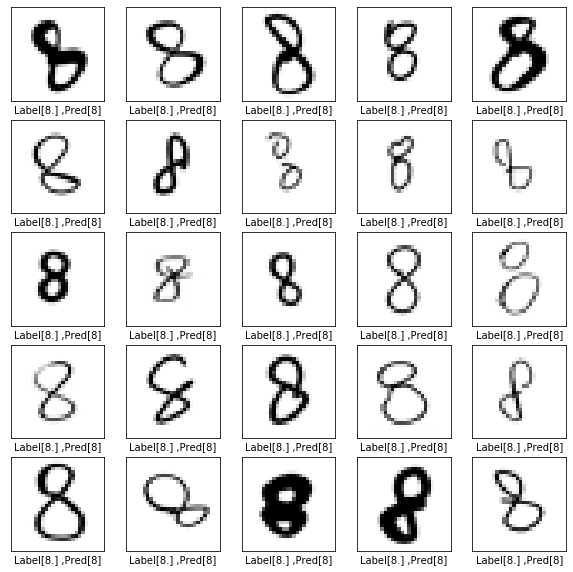

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_real[i+425].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.xlabel("Label" + str(y_real[:,i+425]) + " ,Pred" +str(pred_real[i+425]))
plt.show()

In [9]:
# accuracy
num_wrong = 0
for i in range(500):
    if y_real[:,i]!=pred_real[i]:
        num_wrong += 1

print("The number of correct prediction :", 500-num_wrong)
print("The number of wrong prediction :", num_wrong)
print("Accuracy :", (500-num_wrong)*100/500,"%")

The number of correct prediction : 452
The number of wrong prediction : 48
Accuracy : 90.4 %


In [10]:
for i in range(500):
    if y_real[:,i]!=pred_real[i]:
        print(i)

0
3
4
6
7
8
9
14
24
31
32
33
34
35
38
46
48
54
57
75
95
100
105
107
152
155
157
175
211
219
226
244
255
260
305
338
368
385
386
391
395
399
455
460
463
471
475
491
